The data for this analysis collected on October 2nd, 2022 at 6.p.m Vancouver time.

This notebook, is the second stage of social media analysis for tweets related to Mahsa Amini which is one of the greates trends in twitter.
In this stage, we want to do the followings:
* find the ten most popular words with and without stopwords
* find the ten most popular hashtags
* find the ten most frequently mentioned usernames
* find the 3 most common source of tweets
* create a line to show the time trend of tweet counts
* find the three most influential tweets
* find the most vocal authors on the keyword
* find the 3 most influential authors

You may remember that from the former stage, we gathered 10,000 tweets and saved it in a json file. Now, for doing our analysis, we need to read that file to be able to read our analysis.
So we need to import json and we also import pprint for better showing the files we would read.

In [71]:
import json
import pprint

Next, we want to open the file that we have created. So, we would go for such a code, we will open the file and load the data. But the problem is that codes are not in this folder, so, we need to change our direction to the folder we had formerly. 
Pay attention to use this directories based on your machine.
So, firstly we have:

In [72]:
import os #package for changing directories
os.getcwd()

'/Users/darianghorbanian/Dropbox/MBAN/BAIT 508 - Business Aanlytics Programming/Final Project/03-Primary Analysis'

In [73]:
os.chdir('/Users/darianghorbanian/Dropbox/MBAN/BAIT 508 - Business Aanlytics Programming/Final Project/01-Collecting Data')

In [74]:
with open('recent_post_"climate change" -is-retweet lang-en_10000.json') as json_file:
    json_cc_data=json.load(json_file)

In [75]:
print(type(json_cc_data))
json_cc_data.keys()

<class 'dict'>


dict_keys(['collection_type', 'collection_timestamp', 'query', 'tweet_cnt', 'tweets'])

We would again change the directory to our folder:

In [76]:
os.chdir('/Users/darianghorbanian/Dropbox/MBAN/BAIT 508 - Business Aanlytics Programming/Final Project/03-Primary Analysis')

Now, we can start our analyis. We would strat by doing the text analysis. So, we would collect the worlds of twitts:

In [77]:
words=[] #we make a null primary list
#then we would add the text of each tweet to the list words. 
for tweet in json_cc_data['tweets']:
    words.extend(tweet['text'].split()) #take care to use split function to have the words of each text, otherwise you'll get only charchters
print(type(words))
print(len(words))

<class 'list'>
296872


As we see, for this 10000 tweets, we have a list of 266616 words.

And now, we want to analysis these words. We should seek help from python packages. The one that we need for analyzing the words is Counter. So, we have:

In [78]:
from collections import Counter
#now we would count the words
c = Counter(words)

Now, we can have the most common words:

In [79]:
c.most_common(10)

[('the', 9967),
 ('to', 7648),
 ('climate', 7527),
 ('and', 5707),
 ('change', 5567),
 ('of', 5344),
 ('is', 5008),
 ('a', 4416),
 ('in', 3428),
 ('for', 2518)]

As we see, there are a couple of words which can't be helpful in our analysis. These are stopwords. So, we need to eliminate them. So, let's have a list of stopwords. But, we need a list that gives us the stopwords. We may add some to this list if necessary.
There is a package for python that can help us to do natural language processing. nltk is the package that would give us a lot of facilites. One of them is a list of stopwords. 
Let's install this and related packages:

In [80]:
!pip install nltk

In [81]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/darianghorbanian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [82]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Now, you can see a couple of stopwords that are common.
Now, let's eliminate these words from our total words:

In [83]:
m=['climate','change','Climate', 'The', '&', '&amp', '&amp;','change.', 'change,', 'Change', 'like', 'We', 'You', 'And', 
        'This', 'us', 'know', 'would', 'make', 'think', 'If', 'It', 'get', 'They', 'change?', 'What', 'going',"it’s", 'want', 
        'even']
stopwords.extend(m)

In [84]:
import string
words2=[]
for w in words:
    if w not in stopwords and len(w)>1 and not w.startswith('https'):
        words2.append(w)
print(words2[:20])
print(type(words2))

['@blakesinsight', '@justmyowndrama', '@TinaKotek', '@MothersBistro', 'Piss', 'wowed', 'shitbag', 'Tina', 'Kotek', 'talks', 'abortion', 'LGTBQ', 'turning', 'voters', 'smug', 'arrogant', 'liberal', 'attitude', 'calling', 'white']
<class 'list'>


In [85]:
c2=Counter(words2)
c2.most_common(10)

[('people', 740),
 ('global', 383),
 ('need', 357),
 ('one', 355),
 ('world', 317),
 ('believe', 304),
 ('help', 263),
 ('energy', 255),
 ('real', 242),
 ('new', 233)]

In [86]:
!pip install Pillow

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
#wordcloud = WordCloud(width=800, height=400).generate(words) 
#mask_file=open('cloud.png')

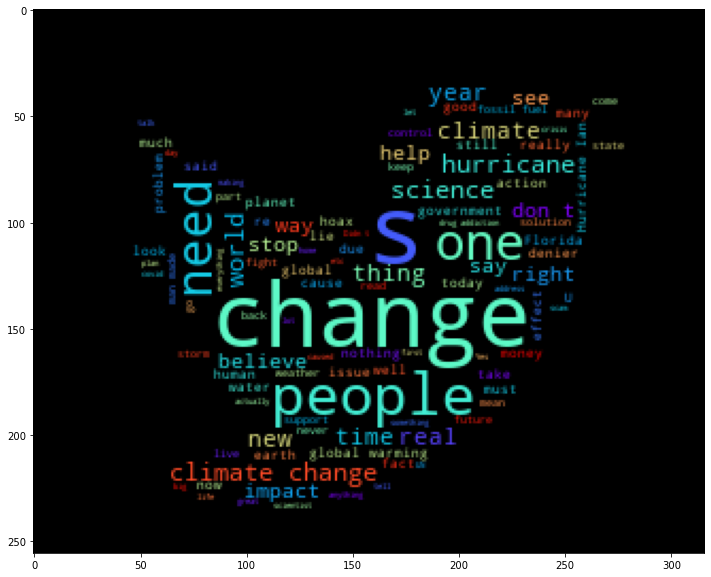

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
text=''
for t in words2:
    text += t + ' '
type(text)
mask1=np.array(Image.open('twitter.png'))
wordcloud = WordCloud(width=800, height=400, mask=mask1, colormap='rainbow').generate(text) 
plt.figure(figsize=(20,10)) # set up figure size
plt.imshow(wordcloud) # word cloud image show
plt.axis("on") # turn on axis
plt.savefig('my_word_cloud.png') # save as PNG file
plt.savefig('my_word_cloud.pdf') # save as PDF file
plt.show()  # show in Jupyter notebook

In [89]:
print(type(text))

<class 'str'>


In [90]:
print(text)

@blakesinsight @justmyowndrama @TinaKotek @MothersBistro Piss wowed shitbag Tina Kotek talks abortion LGTBQ turning voters smug arrogant liberal attitude calling white supremacists cause agree wacko extreme liberal ideas Breaking News! Hurricanes increasing! Is cause?! Just sayin' live LA's Westside see city city fights protects vulnerable communities, tackles housing homelessness crisis ways ACTUALLY work support @WestsideDarling. He's real deal. @JudiciaryGOP Reality check here: @GOP pretend covid wasn't/isn't thing admit effects any1 common sense explains grocery prices. Safety=purging @GOP injected hate in2 society maybe sit STFU! @UlDel @cameraZoe @medialens @JustStop_Oil @GeorgeMonbiot @ChrisGPackham @GretaThunberg many years I've seen action parcel passed around. We've got act act on. #melting #ice LINKS TO CLIMATE CHANGE AND MELTING ICE #climate #change #rising_water #Antarctica #glacier #Greenland In seriousness, great hear @FP_Champagne’s vision Canada strategic, resilient pa

Till here, We found the most commond words in the tweets and also, we made a cloud of words that shows the density of the words.
In the next step, we want to find the ten most popular hashtags. For this, we would need to have in word in which includes a #:

In [91]:
hashtags=['']
for h in words:
    if '#' in h:
        hashtags.append(h)
print(len(hashtags))
ch=Counter(hashtags)

3530


In [92]:
ch.most_common(10)

[('#climatechange', 99),
 ('#climate', 91),
 ('#ClimateChange', 81),
 ('#Climate', 59),
 ('#Freya', 55),
 ('#FreyaTheWalrus', 55),
 ('#ClimateCrisis', 41),
 ('#ClimateEmergency', 41),
 ('#HurricaneIan', 38),
 ('#ClimateAction', 32)]

for finding ten most mentioned usernames, we would follow the similar routine:

In [93]:
usernames=['']
for u in words:
    if '@' in u:
        usernames.append(u)
print(len(usernames))
cn=Counter(usernames)

12681


In [94]:
cn.most_common(10)

[('@FoxNews', 86),
 ('@TomFitton', 79),
 ('@elonmusk', 69),
 ('@GovRonDeSantis', 60),
 ('@StevenBeschloss', 59),
 ('@TimRunsHisMouth', 53),
 ('@PeterSweden7', 53),
 ('@POTUS', 51),
 ('@JoJoFromJerz', 48),
 ('@TotalEnergies', 47)]

Now, we can find three most frequent sources:

In [95]:
sources=[]
for tweet in json_cc_data['tweets']:
    sources.append(tweet['source'])

In [96]:
cs=Counter(sources)
cs.most_common(3)

[('Twitter Web App', 3909),
 ('Twitter for iPhone', 2530),
 ('Twitter for Android', 1966)]

As wee see, a majority of twitts are created via android, then iPhone, and finally Web App

Now, we can analyze the timeline:

In [97]:
json_cc_data['tweets'][0].keys()

dict_keys(['source', 'entities', 'created_at', 'lang', 'text', 'context_annotations', 'edit_history_tweet_ids', 'possibly_sensitive', 'in_reply_to_user_id', 'public_metrics', 'id', 'referenced_tweets', 'author_id'])

In [98]:
json_cc_data['tweets'][0]['created_at']

'2022-10-03T23:06:12.000Z'

In [99]:
import pandas as pd

twitter_data = pd.DataFrame(json_cc_data['tweets'])
twitter_data['created_at'] = pd.to_datetime(twitter_data["created_at"])

In [100]:
twitter_data['year'] = pd.DatetimeIndex(twitter_data['created_at']).year
twitter_data['month'] = pd.DatetimeIndex(twitter_data['created_at']).month
twitter_data['day'] = pd.DatetimeIndex(twitter_data['created_at']).day
twitter_data['hour'] = pd.DatetimeIndex(twitter_data['created_at']).hour
twitter_data['minute'] = pd.DatetimeIndex(twitter_data['created_at']).minute

In [101]:
tweet_in_min = twitter_data.groupby('minute').count()['id']
tweet_in_hour = twitter_data.groupby('hour').count()['id']
tweet_in_day = twitter_data.groupby('day').count()['id']

<AxesSubplot:xlabel='minute'>

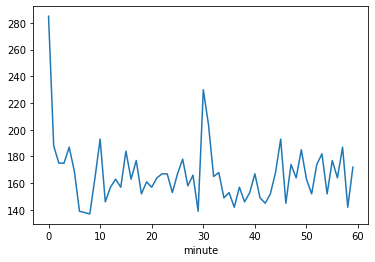

In [102]:
tweet_in_min.plot()

<AxesSubplot:xlabel='hour'>

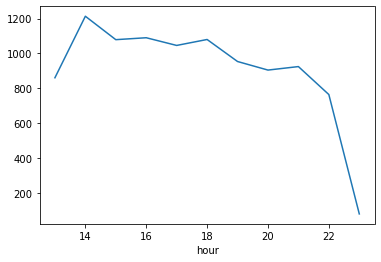

In [103]:
tweet_in_hour.plot()

Now, we are going to find three most influential tweets:

In [104]:
tweet_influence=[]
for i in range(0,len(twitter_data)):
    tweet_influence.append(sum(twitter_data['public_metrics'][i].values()))
    
twitter_data['tweet_influence']=tweet_influence

In [105]:
twitter_data

,source,entities,created_at,lang,text,context_annotations,edit_history_tweet_ids,possibly_sensitive,in_reply_to_user_id,public_metrics,...,referenced_tweets,author_id,attachments,geo,year,month,day,hour,minute,tweet_influence
0,Twitter for Android,"{'annotations': [{'start': 93, 'end': 102, 'pr...",2022-10-03 23:06:12+00:00,en,@blakesinsight @justmyowndrama @TinaKotek @Mot...,"[{'domain': {'id': '131', 'name': 'Unified Twi...",[1577072554820632576],False,2980643382,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",...,"[{'type': 'replied_to', 'id': '157701416307932...",1560493245410357248,NaN,NaN,2022,10,3,23,6,0
1,WordPress.com,"{'urls': [{'start': 84, 'end': 107, 'url': 'ht...",2022-10-03 23:06:12+00:00,en,Breaking News! Hurricanes are increasing! Is c...,"[{'domain': {'id': '131', 'name': 'Unified Twi...",[1577072553566380047],False,NaN,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",...,NaN,4783834469,NaN,NaN,2022,10,3,23,6,0
2,Twitter Web App,"{'urls': [{'start': 277, 'end': 300, 'url': 'h...",2022-10-03 23:06:07+00:00,en,If you live on LA's Westside and you want to s...,"[{'domain': {'id': '131', 'name': 'Unified Twi...",[1577072534700163072],False,NaN,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",...,"[{'type': 'quoted', 'id': '1577013452551266305'}]",5880462,NaN,NaN,2022,10,3,23,6,3
3,Twitter Web App,"{'mentions': [{'start': 0, 'end': 13, 'usernam...",2022-10-03 23:06:03+00:00,en,@JudiciaryGOP Reality check here: U @GOP prete...,"[{'domain': {'id': '123', 'name': 'Ongoing New...",[1577072517717848064],False,1131917492,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",...,"[{'type': 'replied_to', 'id': '157693406982035...",831277785960181764,NaN,NaN,2022,10,3,23,6,0
4,Twitter Web App,"{'mentions': [{'start': 0, 'end': 6, 'username...",2022-10-03 23:06:01+00:00,en,@UlDel @cameraZoe @medialens @JustStop_Oil @Ge...,"[{'domain': {'id': '10', 'name': 'Person', 'de...",[1577072508301611009],False,422690345,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",...,"[{'type': 'replied_to', 'id': '157686594479812...",2216079799,NaN,NaN,2022,10,3,23,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Twitter Web App,"{'urls': [{'start': 23, 'end': 46, 'url': 'htt...",2022-10-03 13:07:16+00:00,en,My governor is a tard.\nhttps://t.co/gzEiJlXxxc,NaN,[1576921828500844546],False,NaN,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",...,NaN,938489490942939138,NaN,NaN,2022,10,3,13,7,0
9996,Twitter for iPhone,"{'mentions': [{'start': 0, 'end': 14, 'usernam...",2022-10-03 13:07:10+00:00,en,@JPetermorley2 @JackPosobiec I’ve seen two cli...,"[{'domain': {'id': '10', 'name': 'Person', 'de...",[1576921804152930305],False,4858755197,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",...,"[{'type': 'replied_to', 'id': '157692048408381...",1416053896292839433,NaN,NaN,2022,10,3,13,7,2
9997,Twitter for iPhone,"{'urls': [{'start': 293, 'end': 316, 'url': 'h...",2022-10-03 13:07:10+00:00,en,@simongerman600 Commercial wind energy was lau...,"[{'domain': {'id': '3', 'name': 'TV Shows', 'd...",[1576921802143543297],False,359188534,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",...,"[{'type': 'replied_to', 'id': '157409765757170...",117142709,"{'media_keys': ['3_1576921798280609797', '3_15...",NaN,2022,10,3,13,7,0
9998,Twitter for iPad,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",2022-10-03 13:07:08+00:00,en,@royalmusing @DWUhlfelderLaw Definitely love s...,"[{'domain': {'id': '46', 'name': 'Business Tax...",[1576921797249097728],False,233033031,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",...,"[{'type': 'replied_to', 'id': '157692077222796...",614299748,NaN,NaN,2022,10,3,13,7,0


In [106]:
twitter_data.sort_values('tweet_influence',ascending=False).head(3)

,source,entities,created_at,lang,text,context_annotations,edit_history_tweet_ids,possibly_sensitive,in_reply_to_user_id,public_metrics,...,referenced_tweets,author_id,attachments,geo,year,month,day,hour,minute,tweet_influence
7314,Twitter Web App,"{'mentions': [{'start': 126, 'end': 129, 'user...",2022-10-03 15:32:58+00:00,en,So I was the only WH pool print reporter in th...,"[{'domain': {'id': '10', 'name': 'Person', 'de...",[1576958495332896768],False,NaN,"{'retweet_count': 4083, 'reply_count': 163, 'l...",...,NaN,155471916,NaN,NaN,2022,10,3,15,32,13837
9106,Twitter for Android,NaN,2022-10-03 14:00:45+00:00,en,The same people telling you to stop climate ch...,"[{'domain': {'id': '131', 'name': 'Unified Twi...",[1576935289268080646],False,NaN,"{'retweet_count': 693, 'reply_count': 187, 'li...",...,NaN,707231479047315456,NaN,NaN,2022,10,3,14,0,4217
7040,Twitter for iPhone,"{'mentions': [{'start': 1, 'end': 15, 'usernam...",2022-10-03 15:49:17+00:00,en,.@KwasiKwarteng has gall to say he has sound p...,"[{'domain': {'id': '10', 'name': 'Person', 'de...",[1576962601212612608],False,NaN,"{'retweet_count': 682, 'reply_count': 46, 'lik...",...,NaN,80802900,NaN,NaN,2022,10,3,15,49,3318


Now, we will find three most local authors:

In [138]:
vocal_authors=twitter_data.groupby('author_id')['id'].count().sort_values(ascending=False)
vocal_authors.head(3).keys()
top_vocal_authors=[int(vocal_authors.head(3).keys()[0]),int(vocal_authors.head(3).keys()[1]),int(vocal_authors.head(3).keys()[2])]
#top_vocal_authors=vocal_authors.head(3).keys()
#top_vocal_authors #these are the ID for the top 3 vocal authors. Now, we can find the authors username for dataset we have for authors
top_vocal_authors

[1466056878077755392, 1264184076, 1169337758]

In [145]:
author_df=pd.read_csv("Author_Info.csv")
author_df[author_df['author_id'].isin(top_vocal_authors)]
#author_df['author_id'][0]

,Unnamed: 0,author_id,name,username,location,created_at,description,followers_count,following_count,tweet_count,listed_count,verified
3944,3948,1264184076,Peter Paul,Pispolo873,"Florence, Italy",2013-03-13T11:12:52.000Z,Pensioned hooligan,13,94,3042,0,False
5767,5780,1169337758,leave world better,scienceman52,NaN,2013-02-11T16:16:18.000Z,NaN,31,19,8259,2,False
7031,7048,1466056878077755392,Seeking Truth&Facts,facts_seeking,NaN,2021-12-01T14:49:53.000Z,NaN,20,210,11946,0,False


Let's do more with authors. Let's find the amount of verified authors:

In [144]:
author_df.shape

(8258, 12)

In [128]:
verified_authors=author_df[author_df['verified']==True]
unverified_authors=author_df[author_df['verified']==False]
number_of_verified_users=verified_authors.shape[0]
number_of_unverified_users=unverified_authors.shape[0]
print(number_of_verified_users)
print(number_of_unverified_users)

529
7748




Now, it's time to do sentiment analysis:

In [54]:
from textblob import TextBlob

In [57]:
TextBlob(twitter_data['text'][0]).sentiment

Sentiment(polarity=-0.0625, subjectivity=0.5)

In [58]:
tweet_polarity=[]
tweet_subjectivity=[]
for i in range(0,len(twitter_data)):
    tweet_polarity.append(TextBlob(twitter_data['text'][i]).sentiment[0])
    tweet_subjectivity.append(TextBlob(twitter_data['text'][i]).sentiment[1])

In [59]:
twitter_data['tweet_polarity']=tweet_polarity
twitter_data['tweet_subjectivity']=tweet_subjectivity

now, we can have the average for polarity and subjectivity:

In [60]:
print(twitter_data['tweet_polarity'].mean())
print(twitter_data['tweet_subjectivity'].mean())

0.06760994351007237
0.39049942477810773


(array([  27.,   88.,  277.,  589., 1437., 5322., 1377.,  648.,  141.,
          94.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

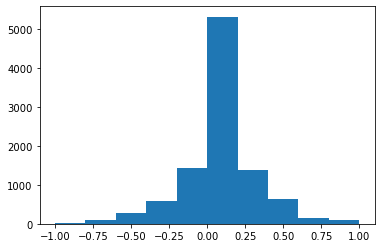

In [61]:
plt.hist(twitter_data['tweet_polarity'])

(array([2296.,  549.,  905., 1029., 1227., 1690.,  989.,  488.,  308.,
         519.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

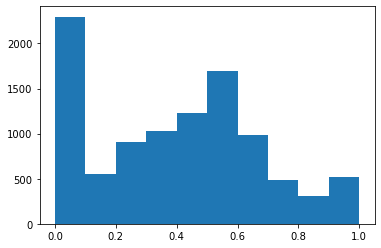

In [63]:
plt.hist(twitter_data['tweet_subjectivity'])

In [520]:
twitter_data['tweet_polarity'].sort_values(ascending=False)

7220    1.0
7434    1.0
6199    1.0
349     1.0
3663    1.0
       ... 
1017   -1.0
9627   -1.0
7351   -1.0
431    -1.0
1564   -1.0
Name: tweet_polarity, Length: 10000, dtype: float64